In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def Hist(holes, split=False):
    a=np.genfromtxt(str(holes)+".dat", delimiter =" ").flatten()
    high=a[a>300]
    low=a[a<300]
    
    if (split == False) or (len(high)==0):
        plt.hist(a, label="Data")
        
        mu, sig = norm.fit(a)
        textstr="Mu= " + str(np.round(mu, 6)) + ", Sigma= "+ str(np.round(sig, 6))
        x=np.arange(np.min(a), np.max(a), 0.001)
        plt.plot(x,  norm.pdf(x, mu, sig), label=textstr)
        plt.legend()
        plt.title(str(holes) + " holes")
    else:
        fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
        axs[0].hist(low, label="Data")
        axs[0].title.set_text(str(holes) + " holes (" + str(len(low))+" low values)")
        
        mu0, sig0 = norm.fit(low)
        textstr="Mu= " + str(np.round(mu0, 6)) + ", Sigma= "+ str(np.round(sig0, 6))
        x=np.arange(np.min(low), np.max(low), 0.001)
        axs[0].plot(x,  norm.pdf(x, mu0, sig0), label=textstr)
        axs[0].legend()
        
        
        axs[1].hist(high, label="Data")
        axs[1].title.set_text(str(holes) + " holes (" + str(len(high))+" high values)")
        mu, sig = norm.fit(high)
        textstr="Mu= " + str(np.round(mu, 6)) + ", Sigma= "+ str(np.round(sig, 6))
        x=np.arange(np.min(high), np.max(high), 0.001)
        axs[1].plot(x,  norm.pdf(x, mu, sig), label=textstr)
        axs[1].legend()
    plt.savefig("./figures/" +str(holes)+ ".png")
    plt.show()

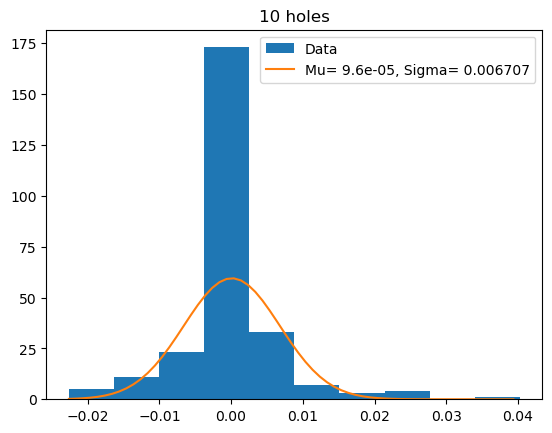

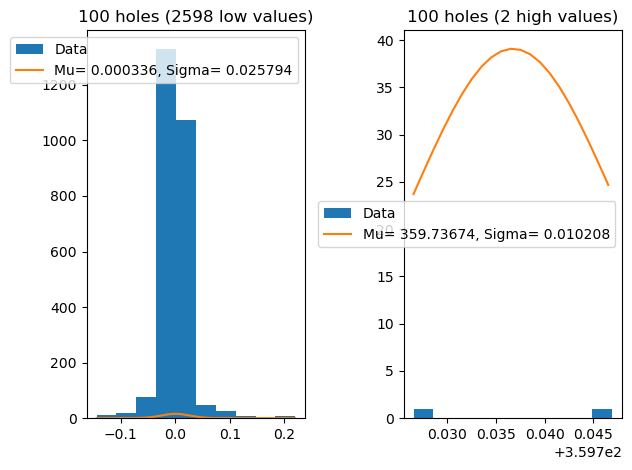

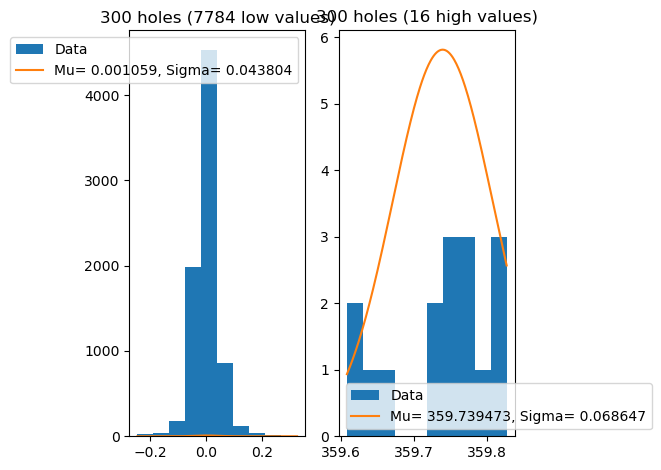

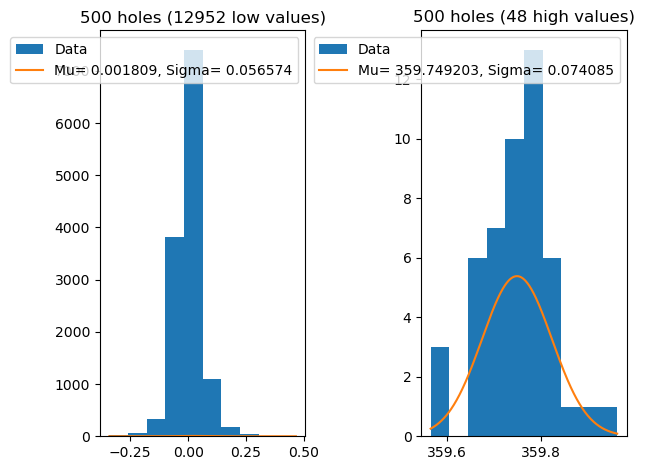

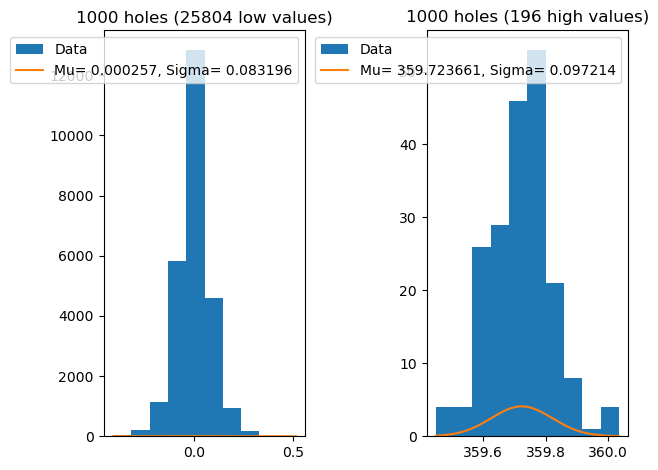

In [3]:
holes =[10,100,300,500,1000]
for i in holes:
    Hist(i, split=True)